In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fl_df = pd.read_csv("Fuel_Data.csv")
fl_df.head()

,Day of Month,Grade,Measure Names,Month of Date,Site,Year of Date,Measure Values
0,1,Regular Gas,Gallons,January,118,2022,66.806640
1,1,Regular Gas,Sales,January,118,2022,177.884832
2,1,Regular Gas,Avg Price,January,118,2022,0.050207
3,1,Regular Gas,Cost,January,118,2022,224.012778
4,1,Regular Gas,Gallons,January,118,2023,72.599825


In [3]:
nulls = fl_df.isnull().sum()
nulls


Day of Month      0
Grade             0
Measure Names     0
Month of Date     0
Site              0
Year of Date      0
Measure Values    0
dtype: int64

In [4]:
description = fl_df.describe()
description

,Day of Month,Site,Year of Date,Measure Values
count,917748.000000,917748.000000,917748.000000,917748.000000
mean,15.735884,3195.412959,2022.511931,98.114785
std,8.799154,3827.102009,0.499858,109.630028
min,1.000000,118.000000,2022.000000,-184.089276
25%,8.000000,474.000000,2022.000000,0.096743
50%,16.000000,778.000000,2023.000000,65.643303
75%,23.000000,3812.000000,2023.000000,149.775731
max,31.000000,10153.000000,2023.000000,1784.709072


In [7]:
st_df= pd.read_csv("SITE_DATA.csv")
st_df.head()


,GDSO,Fuel Brand ID,Site Status,LAND / COT,Divison,Location Type,Site Rank ID,City ID,ST,County ID,...,C Store Brand ID,# of MPD's,Diesel?,Separate Diesel Canopy?,High-Speed Diesel,Multi Dealers,Auto Service Bay,Car Wash,Store SQ FT,Lot SQ FT
0,6,1,OPEN,Control Type 3,P,Gas Station,1,1,CT,1,...,1,4,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,1228,12632
1,30,2,OPEN,Control Type 3,P,Gas Station,2,2,CT,2,...,1,4,Diesel,NO,NO,Yes,No Auto Service Bay,No Car Wash,2100,30492
2,35,2,OPEN,Control Type 3,PR,Gas Station,3,3,CT,1,...,1,4,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,1680,20909
3,55,2,OPEN,Control Type 3,A,Gas Station,1,4,CT,1,...,1,5,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,6689,82764
4,60,3,OPEN,Control Type 3,P,Gas Station,3,5,CT,1,...,1,2,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,756,87120


In [9]:
st_df.isnull().sum()

GDSO                         0
Fuel Brand ID                0
Site Status                  0
LAND / COT                   0
Divison                      0
Location Type                0
Site Rank ID                 0
City ID                      0
ST                           0
County ID                    0
Store Brand ID               0
C Store Brand ID             0
# of MPD's                 104
Diesel?                      1
Separate Diesel Canopy?      0
High-Speed Diesel            2
Multi Dealers                0
Auto Service Bay             1
Car Wash                     1
Store SQ FT                  1
Lot SQ FT                   68
dtype: int64

In [11]:
desc = st_df.describe()
desc

,GDSO,Fuel Brand ID,Site Rank ID,City ID,County ID,Store Brand ID,C Store Brand ID
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,83722.408511,4.029787,2.807092,193.839716,44.255319,5.073759,8.641135
std,252074.068930,4.065929,1.269039,126.060157,33.179780,4.454021,8.891726
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,768.000000,2.000000,2.000000,84.000000,9.000000,2.000000,1.000000
50%,3637.000000,2.000000,3.000000,191.000000,48.000000,4.000000,7.000000
75%,10004.000000,4.000000,4.000000,297.000000,71.000000,5.000000,15.000000
max,880864.000000,16.000000,7.000000,415.000000,101.000000,19.000000,26.000000


In [13]:
st_df = st_df.dropna()

In [15]:
st_df.isnull().sum()

GDSO                       0
Fuel Brand ID              0
Site Status                0
LAND / COT                 0
Divison                    0
Location Type              0
Site Rank ID               0
City ID                    0
ST                         0
County ID                  0
Store Brand ID             0
C Store Brand ID           0
# of MPD's                 0
Diesel?                    0
Separate Diesel Canopy?    0
High-Speed Diesel          0
Multi Dealers              0
Auto Service Bay           0
Car Wash                   0
Store SQ FT                0
Lot SQ FT                  0
dtype: int64

In [17]:
num_cols = st_df.select_dtypes(include=['number']).columns
num_cols

Index(['GDSO', 'Fuel Brand ID', 'Site Rank ID', 'City ID', 'County ID',
       'Store Brand ID', 'C Store Brand ID'],
      dtype='object')

In [19]:
cat_cols = st_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Site Status', 'LAND / COT', 'Divison', 'Location Type', 'ST',
       '# of MPD's', 'Diesel?', 'Separate Diesel Canopy?', 'High-Speed Diesel',
       'Multi Dealers', 'Auto Service Bay', 'Car Wash', 'Store SQ FT',
       'Lot SQ FT'],
      dtype='object')

In [21]:
st_df.describe()

,GDSO,Fuel Brand ID,Site Rank ID,City ID,County ID,Store Brand ID,C Store Brand ID
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,4386.609715,4.244556,2.718593,181.073702,40.678392,5.420436,7.110553
std,3633.962679,4.311350,1.172048,110.275424,29.375612,4.680294,7.694536
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,810.000000,2.000000,2.000000,86.000000,9.000000,3.000000,1.000000
50%,3625.000000,2.000000,3.000000,181.000000,43.000000,4.000000,5.000000
75%,6603.000000,4.000000,3.000000,265.000000,68.000000,5.000000,10.000000
max,15185.000000,16.000000,6.000000,400.000000,98.000000,19.000000,25.000000


In [23]:
print("Fuel Data Columns:", fl_df.columns)
print("Site Data Columns:", st_df.columns)

Fuel Data Columns: Index(['Day of Month', 'Grade', 'Measure Names', 'Month of Date', 'Site',
       'Year of Date', 'Measure Values'],
      dtype='object')
Site Data Columns: Index(['GDSO', 'Fuel Brand ID', 'Site Status', 'LAND / COT', 'Divison',
       'Location Type', 'Site Rank ID', 'City ID', 'ST', 'County ID',
       'Store Brand ID', 'C Store Brand ID', '# of MPD's', 'Diesel?',
       'Separate Diesel Canopy?', 'High-Speed Diesel', 'Multi Dealers',
       'Auto Service Bay', 'Car Wash', 'Store SQ FT', 'Lot SQ FT'],
      dtype='object')


In [25]:
fl_df["Date"] = pd.to_datetime(
    fl_df["Year of Date"].astype(str) + '-' + fl_df["Month of Date"] + '-' + fl_df["Day of Month"].astype(str),
    errors="coerce"
)

In [26]:
fl_df.head()

,Day of Month,Grade,Measure Names,Month of Date,Site,Year of Date,Measure Values,Date
0,1,Regular Gas,Gallons,January,118,2022,66.806640,2022-01-01
1,1,Regular Gas,Sales,January,118,2022,177.884832,2022-01-01
2,1,Regular Gas,Avg Price,January,118,2022,0.050207,2022-01-01
3,1,Regular Gas,Cost,January,118,2022,224.012778,2022-01-01
4,1,Regular Gas,Gallons,January,118,2023,72.599825,2023-01-01


In [27]:
fl_df.drop(columns=["Day of Month", "Month of Date", "Year of Date"], inplace=True)

In [28]:
fl_df.head()

,Grade,Measure Names,Site,Measure Values,Date
0,Regular Gas,Gallons,118,66.806640,2022-01-01
1,Regular Gas,Sales,118,177.884832,2022-01-01
2,Regular Gas,Avg Price,118,0.050207,2022-01-01
3,Regular Gas,Cost,118,224.012778,2022-01-01
4,Regular Gas,Gallons,118,72.599825,2023-01-01


In [29]:
df = fl_df.merge(st_df, left_on="Site", right_on="GDSO", how="left")
df.tail()

,Grade,Measure Names,Site,Measure Values,Date,GDSO,Fuel Brand ID,Site Status,LAND / COT,Divison,...,C Store Brand ID,# of MPD's,Diesel?,Separate Diesel Canopy?,High-Speed Diesel,Multi Dealers,Auto Service Bay,Car Wash,Store SQ FT,Lot SQ FT
917743,Regular Gas,Cost,10153,66.616211,2022-12-31,10153.0,4.0,OPEN,Control Type 4,D,...,1.0,2,NO,NO,NO,No,No Auto Service Bay,No Car Wash,3145,17655
917744,Regular Gas,Gallons,10153,38.068649,2023-12-31,10153.0,4.0,OPEN,Control Type 4,D,...,1.0,2,NO,NO,NO,No,No Auto Service Bay,No Car Wash,3145,17655
917745,Regular Gas,Sales,10153,71.847552,2023-12-31,10153.0,4.0,OPEN,Control Type 4,D,...,1.0,2,NO,NO,NO,No,No Auto Service Bay,No Car Wash,3145,17655
917746,Regular Gas,Avg Price,10153,0.057426,2023-12-31,10153.0,4.0,OPEN,Control Type 4,D,...,1.0,2,NO,NO,NO,No,No Auto Service Bay,No Car Wash,3145,17655
917747,Regular Gas,Cost,10153,71.618148,2023-12-31,10153.0,4.0,OPEN,Control Type 4,D,...,1.0,2,NO,NO,NO,No,No Auto Service Bay,No Car Wash,3145,17655


In [30]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Grade', 'Measure Names', 'Site Status', 'LAND / COT', 'Divison',
       'Location Type', 'ST', '# of MPD's', 'Diesel?',
       'Separate Diesel Canopy?', 'High-Speed Diesel', 'Multi Dealers',
       'Auto Service Bay', 'Car Wash', 'Store SQ FT', 'Lot SQ FT'],
      dtype='object')

### One-hot Encoding

In [36]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,Site,Measure Values,Date,GDSO,Fuel Brand ID,Site Rank ID,City ID,County ID,Store Brand ID,C Store Brand ID,...,Lot SQ FT_85116,Lot SQ FT_8712,Lot SQ FT_87120,Lot SQ FT_88870,Lot SQ FT_91171,Lot SQ FT_91476,Lot SQ FT_91663,Lot SQ FT_91911.6,Lot SQ FT_98010,Lot SQ FT_TBD
0,118,66.806640,2022-01-01,118.0,2.0,2.0,10.0,3.0,4.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,118,177.884832,2022-01-01,118.0,2.0,2.0,10.0,3.0,4.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,118,0.050207,2022-01-01,118.0,2.0,2.0,10.0,3.0,4.0,2.0,...,False,False,False,False,False,False,False,False,False,False
3,118,224.012778,2022-01-01,118.0,2.0,2.0,10.0,3.0,4.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,118,72.599825,2023-01-01,118.0,2.0,2.0,10.0,3.0,4.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917743,10153,66.616211,2022-12-31,10153.0,4.0,1.0,369.0,78.0,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False
917744,10153,38.068649,2023-12-31,10153.0,4.0,1.0,369.0,78.0,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False
917745,10153,71.847552,2023-12-31,10153.0,4.0,1.0,369.0,78.0,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False
917746,10153,0.057426,2023-12-31,10153.0,4.0,1.0,369.0,78.0,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,Site,Measure Values,GDSO,Fuel Brand ID,Site Rank ID,City ID,County ID,Store Brand ID,C Store Brand ID
0,118,66.806640,118.0,2.0,2.0,10.0,3.0,4.0,2.0
1,118,177.884832,118.0,2.0,2.0,10.0,3.0,4.0,2.0
2,118,0.050207,118.0,2.0,2.0,10.0,3.0,4.0,2.0
3,118,224.012778,118.0,2.0,2.0,10.0,3.0,4.0,2.0
4,118,72.599825,118.0,2.0,2.0,10.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
917743,10153,66.616211,10153.0,4.0,1.0,369.0,78.0,5.0,1.0
917744,10153,38.068649,10153.0,4.0,1.0,369.0,78.0,5.0,1.0
917745,10153,71.847552,10153.0,4.0,1.0,369.0,78.0,5.0,1.0
917746,10153,0.057426,10153.0,4.0,1.0,369.0,78.0,5.0,1.0


In [39]:
corr_matrix = numeric_df.corr()
corr_matrix

,Site,Measure Values,GDSO,Fuel Brand ID,Site Rank ID,City ID,County ID,Store Brand ID,C Store Brand ID
Site,1.000000,-0.080591,1.000000,-0.024130,-0.427344,0.824419,0.309323,-0.096759,0.744934
Measure Values,-0.080591,1.000000,-0.089900,-0.001120,-0.095009,-0.059007,-0.083106,0.011056,-0.122124
GDSO,1.000000,-0.089900,1.000000,-0.024130,-0.427344,0.824419,0.309323,-0.096759,0.744934
Fuel Brand ID,-0.024130,-0.001120,-0.024130,1.000000,0.192123,-0.015617,0.063932,0.834294,0.054411
Site Rank ID,-0.427344,-0.095009,-0.427344,0.192123,1.000000,-0.381246,-0.149433,0.151013,-0.193878
City ID,0.824419,-0.059007,0.824419,-0.015617,-0.381246,1.000000,0.394393,-0.050966,0.602481
County ID,0.309323,-0.083106,0.309323,0.063932,-0.149433,0.394393,1.000000,0.012621,0.250613
Store Brand ID,-0.096759,0.011056,-0.096759,0.834294,0.151013,-0.050966,0.012621,1.000000,-0.025579
C Store Brand ID,0.744934,-0.122124,0.744934,0.054411,-0.193878,0.602481,0.250613,-0.025579,1.000000


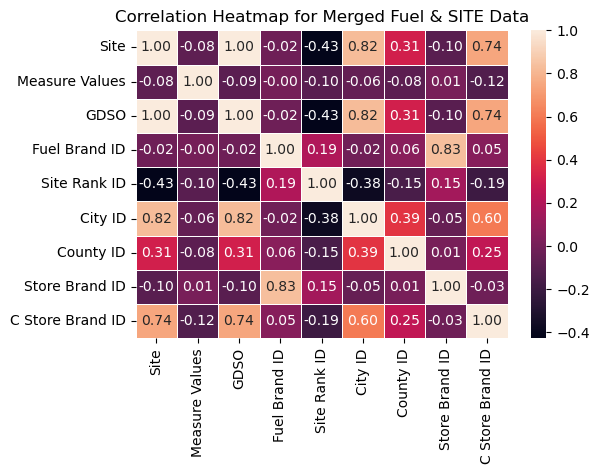

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Merged Fuel & SITE Data")
plt.show()

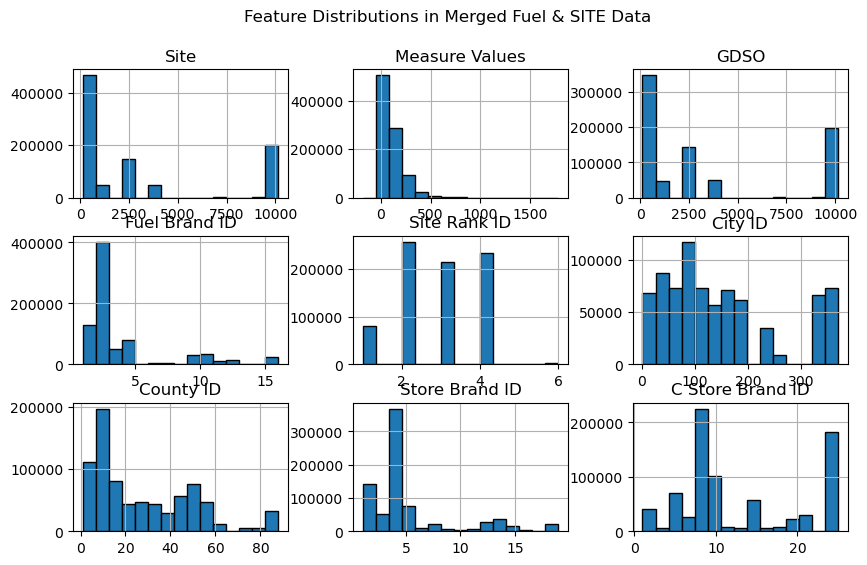

In [42]:
numeric_df.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions in Merged Fuel & SITE Data")
plt.show()

In [43]:
df.head()

,Grade,Measure Names,Site,Measure Values,Date,GDSO,Fuel Brand ID,Site Status,LAND / COT,Divison,...,C Store Brand ID,# of MPD's,Diesel?,Separate Diesel Canopy?,High-Speed Diesel,Multi Dealers,Auto Service Bay,Car Wash,Store SQ FT,Lot SQ FT
0,Regular Gas,Gallons,118,66.806640,2022-01-01,118.0,2.0,OPEN,Control Type 4,E 1,...,2.0,6,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,552,50094
1,Regular Gas,Sales,118,177.884832,2022-01-01,118.0,2.0,OPEN,Control Type 4,E 1,...,2.0,6,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,552,50094
2,Regular Gas,Avg Price,118,0.050207,2022-01-01,118.0,2.0,OPEN,Control Type 4,E 1,...,2.0,6,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,552,50094
3,Regular Gas,Cost,118,224.012778,2022-01-01,118.0,2.0,OPEN,Control Type 4,E 1,...,2.0,6,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,552,50094
4,Regular Gas,Gallons,118,72.599825,2023-01-01,118.0,2.0,OPEN,Control Type 4,E 1,...,2.0,6,Diesel,NO,NO,No,No Auto Service Bay,No Car Wash,552,50094


In [44]:
# Ensuring Date is a datetime column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.rename(columns={"Measure Values": "Total Gallons Sold"}, inplace=True)
print("Columns:", df.columns)

Columns: Index(['Grade', 'Measure Names', 'Site', 'Total Gallons Sold', 'Date', 'GDSO',
       'Fuel Brand ID', 'Site Status', 'LAND / COT', 'Divison',
       'Location Type', 'Site Rank ID', 'City ID', 'ST', 'County ID',
       'Store Brand ID', 'C Store Brand ID', '# of MPD's', 'Diesel?',
       'Separate Diesel Canopy?', 'High-Speed Diesel', 'Multi Dealers',
       'Auto Service Bay', 'Car Wash', 'Store SQ FT', 'Lot SQ FT'],
      dtype='object')


In [45]:
daily_sales = df.groupby("Date")["Total Gallons Sold"].sum().reset_index()

In [46]:
daily_sales

,Date,Total Gallons Sold
0,2022-01-01,52664.716376
1,2022-01-02,64657.997289
2,2022-01-03,82044.080065
3,2022-01-04,81967.539658
4,2022-01-05,75059.752655
...,...,...
725,2023-12-27,102289.543663
726,2023-12-28,101402.598297
727,2023-12-29,108882.590880
728,2023-12-30,93119.162398


In [47]:
print(daily_sales.head())

        Date  Total Gallons Sold
0 2022-01-01        52664.716376
1 2022-01-02        64657.997289
2 2022-01-03        82044.080065
3 2022-01-04        81967.539658
4 2022-01-05        75059.752655


In [48]:
import matplotlib.pyplot as plt

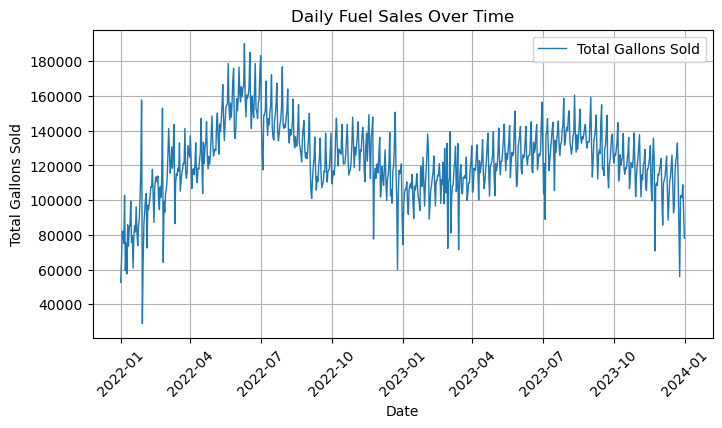

In [49]:
plt.figure(figsize=(8, 4))
plt.plot(daily_sales["Date"], daily_sales["Total Gallons Sold"], label="Total Gallons Sold", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("Daily Fuel Sales Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [50]:
daily_sales["Weekday"] = daily_sales["Date"].dt.weekday  
daily_sales["Month"] = daily_sales["Date"].dt.month

In [51]:
weekly_trend = daily_sales.groupby("Weekday")["Total Gallons Sold"].mean()
monthly_trend = daily_sales.groupby("Month")["Total Gallons Sold"].mean()

In [52]:
weekly_trend

Weekday
0    120181.765533
1    121131.438319
2    125312.663174
3    130353.737464
4    139145.667426
5    117294.389293
6    110206.751597
Name: Total Gallons Sold, dtype: float64

In [55]:
monthly_trend

Month
1      93250.855035
2     106992.600638
3     116132.767982
4     121889.931863
5     137039.670274
6     145232.694550
7     139758.275664
8     137906.669175
9     125073.916535
10    124455.087691
11    121556.406001
12    109970.956442
Name: Total Gallons Sold, dtype: float64

In [56]:
daily_sales.isnull().sum()

Date                  0
Total Gallons Sold    0
Weekday               0
Month                 0
dtype: int64

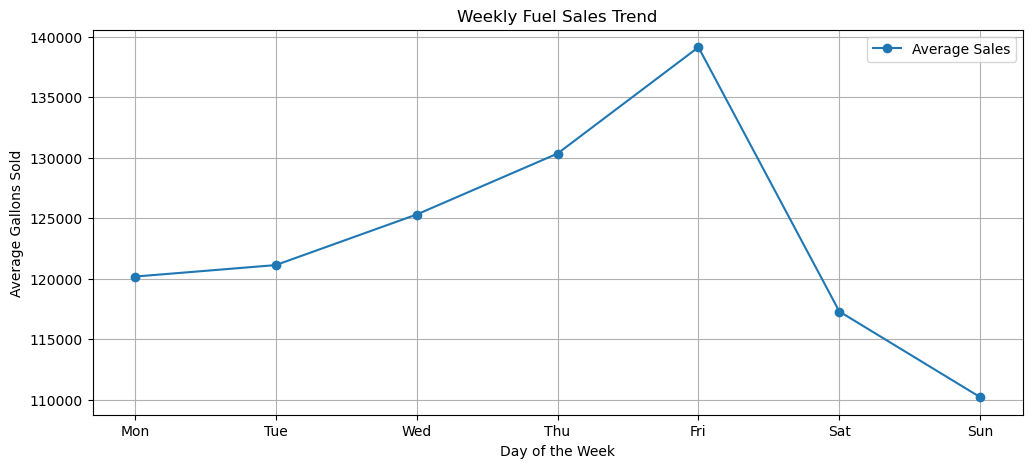

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_trend.index, weekly_trend.values, marker="o", linestyle="-", label="Average Sales")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Gallons Sold")
plt.title("Weekly Fuel Sales Trend")
plt.legend()
plt.grid(True)
plt.show()

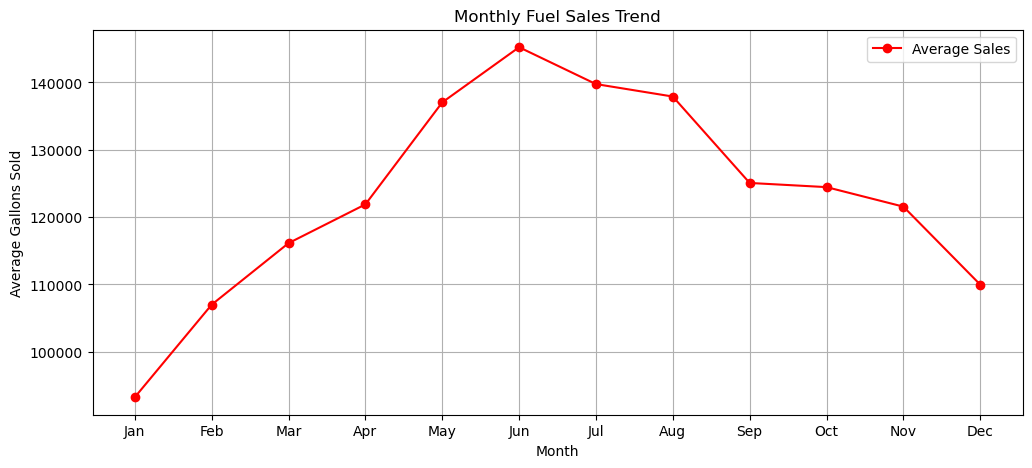

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker="o", linestyle="-", color="red", label="Average Sales")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average Gallons Sold")
plt.title("Monthly Fuel Sales Trend")
plt.legend()
plt.grid(True)
plt.show()

### Feature engineering

In [62]:
daily_sales["Lag_1"] = daily_sales["Total Gallons Sold"].shift(1)
daily_sales["Lag_7"] = daily_sales["Total Gallons Sold"].shift(7)
daily_sales["Lag_30"] = daily_sales["Total Gallons Sold"].shift(30)

In [63]:
daily_sales["Rolling_7"] = daily_sales["Total Gallons Sold"].rolling(window=7).mean()
daily_sales["Rolling_30"] = daily_sales["Total Gallons Sold"].rolling(window=30).mean()

In [81]:
print(daily_sales.head())

        Date  Total Gallons Sold  Weekday  Month         Lag_1  Lag_7  Lag_30  \
0 2022-01-01        52664.716376        5      1           NaN    NaN     NaN   
1 2022-01-02        64657.997289        6      1  52664.716376    NaN     NaN   
2 2022-01-03        82044.080065        0      1  64657.997289    NaN     NaN   
3 2022-01-04        81967.539658        1      1  82044.080065    NaN     NaN   
4 2022-01-05        75059.752655        2      1  81967.539658    NaN     NaN   

   Rolling_7  Rolling_30  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [83]:
daily_sales.dropna(inplace=True)

### SARIMA

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [87]:
train_data = daily_sales[daily_sales["Date"] < daily_sales["Date"].max() - pd.DateOffset(months=3)]
test_data = daily_sales[daily_sales["Date"] >= daily_sales["Date"].max() - pd.DateOffset(months=3)]

In [88]:
train_series = train_data.set_index("Date")["Total Gallons Sold"]
test_series = test_data.set_index("Date")["Total Gallons Sold"]

In [89]:
sarima_model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()
sarima_result

C:\Users\Sai Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sai Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [90]:
# Predict on test set
sarima_pred = sarima_result.predict(start=test_series.index[0], end=test_series.index[-1])
sarima_pred

2023-09-30    114999.636671
2023-10-01    107798.643639
2023-10-02    114491.430200
2023-10-03    120832.363846
2023-10-04    123548.197540
                  ...      
2023-12-27     91602.873774
2023-12-28    100423.184771
2023-12-29    107137.003019
2023-12-30     79683.636947
2023-12-31     72542.527378
Freq: D, Name: predicted_mean, Length: 93, dtype: float64

In [91]:
# Evaluating SARIMA Model
sarima_mae = mean_absolute_error(test_series, sarima_pred)
sarima_rmse = np.sqrt(mean_squared_error(test_series, sarima_pred))

In [92]:
sarima_mae, sarima_rmse

(11733.456623732258, 14176.312575020997)

In [93]:
sarima_mape = (sarima_mae / test_series.mean()) * 100
sarima_mape

10.201399414437782

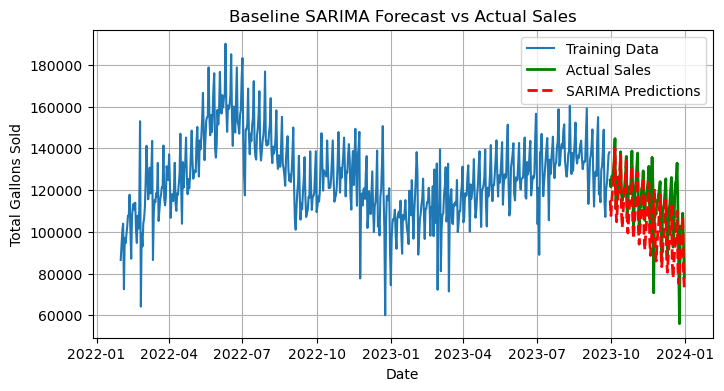

In [94]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(train_series, label="Training Data")
plt.plot(test_series, label="Actual Sales", linewidth=2, color="green")
plt.plot(sarima_pred, label="SARIMA Predictions", linewidth=2, linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("Baseline SARIMA Forecast vs Actual Sales")
plt.legend()
plt.grid(True)
plt.show()

#### Fine Tunning SARIMA

In [149]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 26.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [151]:
from pmdarima import auto_arima

# Find the best SARIMA parameters
auto_model = auto_arima(train_series, seasonal=True, m=7, trace=True, suppress_warnings=True, stepwise=True, max_order=(3,3,3))

# Extract best parameters
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=13384.514, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=13170.986, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=13123.301, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=13382.534, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=13220.249, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=13083.866, Time=1.34 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=12980.259, Time=5.07 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=7.12 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=13146.254, Time=2.43 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=12964.529, Time=6.45 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=13062.409, Time=1.67 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1

In [152]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train_series, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

sarima_fitted = sarima_model.fit()


C:\Users\Sai Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sai Sravan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [153]:
forecast = sarima_fitted.get_forecast(steps=90)
future_predictions = forecast.predicted_mean

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate predictions
sarima_predictions = sarima_fitted.predict(start=len(train_series), end=len(train_series) + len(test_series) - 1)

# Compute metrics
sarima_mae = mean_absolute_error(test_series, sarima_predictions)
sarima_rmse = np.sqrt(mean_squared_error(test_series, sarima_predictions))
sarima_mape = np.mean(np.abs((test_series - sarima_predictions) / test_series)) * 100

print(f"Tuned SARIMA MAE: {sarima_mae:.2f}")
print(f"Tuned SARIMA RMSE: {sarima_rmse:.2f}")
print(f"Tuned SARIMA MAPE: {sarima_mape:.2f}%")

Tuned SARIMA MAE: 6944.79
Tuned SARIMA RMSE: 10324.63
Tuned SARIMA MAPE: 6.94%


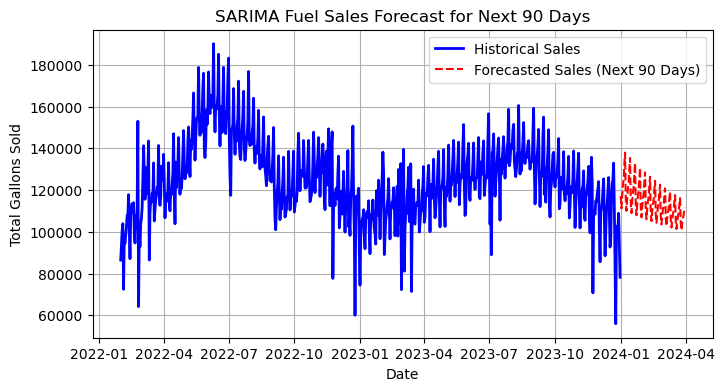

In [155]:
# Generate 90-day future predictions
future_forecast = sarima_fitted.get_forecast(steps=90)
future_forecast_mean = future_forecast.predicted_mean

# Create future date range
future_dates = pd.date_range(start=daily_sales["Date"].max(), periods=91, freq="D")[1:]

# Save forecast in DataFrame
future_sales = pd.DataFrame({"Date": future_dates, "Predicted Sales": future_forecast_mean})

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(daily_sales["Date"], daily_sales["Total Gallons Sold"], label="Historical Sales", linewidth=2, color="blue")
plt.plot(future_sales["Date"], future_sales["Predicted Sales"], label="Forecasted Sales (Next 90 Days)", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("SARIMA Fuel Sales Forecast for Next 90 Days")
plt.legend()
plt.grid(True)
plt.show()


### XG Boost

In [157]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
print(daily_sales.columns)

Index(['Date', 'Total Gallons Sold', 'Weekday', 'Month', 'Lag_1', 'Lag_7',
       'Lag_30', 'Rolling_7', 'Rolling_30'],
      dtype='object')


In [159]:
from xgboost import XGBRegressor

In [160]:
features = ["Lag_1", "Lag_7", "Lag_30", "Rolling_7", "Rolling_30", "Weekday", "Month"]
target = "Total Gallons Sold"

In [161]:
train_xgb = daily_sales[daily_sales["Date"] < daily_sales["Date"].max() - pd.DateOffset(months=3)]
test_xgb = daily_sales[daily_sales["Date"] >= daily_sales["Date"].max() - pd.DateOffset(months=3)]

In [162]:
X_train, y_train = train_xgb[features], train_xgb[target]
X_test, y_test = test_xgb[features], test_xgb[target]

In [163]:
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [164]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred

array([119120.62 , 112697.62 , 126627.914, 126750.39 , 128012.9  ,
       132552.23 , 132258.81 , 115594.766, 110815.69 , 120481.85 ,
       111060.69 , 117567.23 , 135217.22 , 138857.89 , 118861.25 ,
       111428.19 , 109589.41 , 113816.89 , 117062.01 , 128458.42 ,
       137607.16 , 115383.945, 109936.17 , 113341.85 , 110099.1  ,
       116434.695, 124551.28 , 135605.83 , 118199.64 , 111593.234,
       114055.55 , 114880.01 , 119545.54 , 128437.8  , 137181.77 ,
       114885.81 , 108505.57 , 118843.79 , 117304.13 , 121275.72 ,
       127191.21 , 136872.   , 108834.516, 106266.73 , 116905.37 ,
       116575.94 , 120420.805, 126271.36 , 129909.1  , 112718.05 ,
       107751.15 , 115622.016, 116489.92 , 122806.87 , 119719.016,
       120131.11 , 102674.13 , 101302.945, 116113.81 , 117537.734,
       117534.57 , 118970.195, 128767.46 , 105832.56 ,  94678.055,
       109410.71 , 113588.65 , 116246.58 , 119011.77 , 122901.15 ,
        98707.81 ,  97394.64 , 108973.09 , 112802.82 , 113736.

In [165]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

In [166]:
xgb_mae, xgb_rmse

(5731.916895617817, 9333.107389459581)

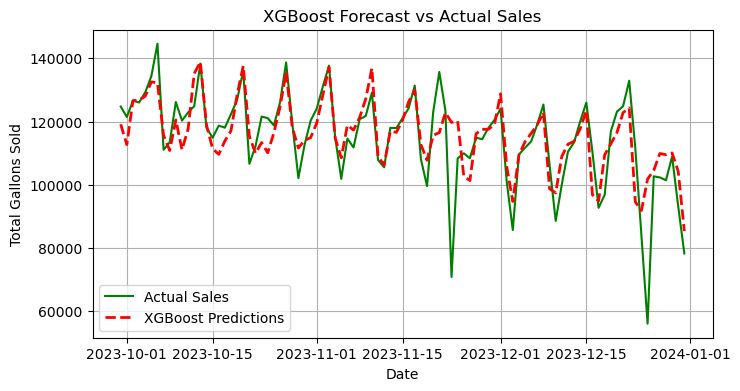

In [167]:
plt.figure(figsize=(8, 4))
plt.plot(test_xgb["Date"], y_test, label="Actual Sales", color="green")
plt.plot(test_xgb["Date"], xgb_pred, label="XGBoost Predictions", linewidth=2, linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("XGBoost Forecast vs Actual Sales")
plt.legend()
plt.grid(True)
plt.show()

In [168]:
# Calculating Mean Absolute Percentage Error (MAPE)
xgb_mape = (xgb_mae / y_test.mean()) * 100
xgb_mape

4.9834908448284665

### Fine-tune

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [172]:
xgb_tuned = XGBRegressor(objective="reg:squarederror")

In [173]:
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [174]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [175]:
xgb_tuned = XGBRegressor(**best_params, objective="reg:squarederror")
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [176]:
xgb_tuned_pred = xgb_tuned.predict(X_test)

In [177]:
xgb_tuned_mae = mean_absolute_error(y_test, xgb_tuned_pred)
xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, xgb_tuned_pred))

In [178]:
xgb_tuned_mape = (xgb_tuned_mae / y_test.mean()) * 100
xgb_tuned_mape

4.718756015378315

In [179]:
print("Best Parameters:", best_params)
print("Tuned XGBoost MAE:", xgb_tuned_mae)
print("Tuned XGBoost RMSE:", xgb_tuned_rmse)
print("Tuned XGBoost MAPE:", xgb_tuned_mape)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Tuned XGBoost MAE: 5427.423902847795
Tuned XGBoost RMSE: 9099.468536367282
Tuned XGBoost MAPE: 4.718756015378315


### Feature Importance

In [181]:
feature_importance = xgb_tuned.feature_importances_
feature_names = X_train.columns

In [182]:
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)
importance_df

,Feature,Importance
1,Lag_7,0.566753
3,Rolling_7,0.190548
0,Lag_1,0.092143
5,Weekday,0.067063
2,Lag_30,0.030912
6,Month,0.026702
4,Rolling_30,0.025879


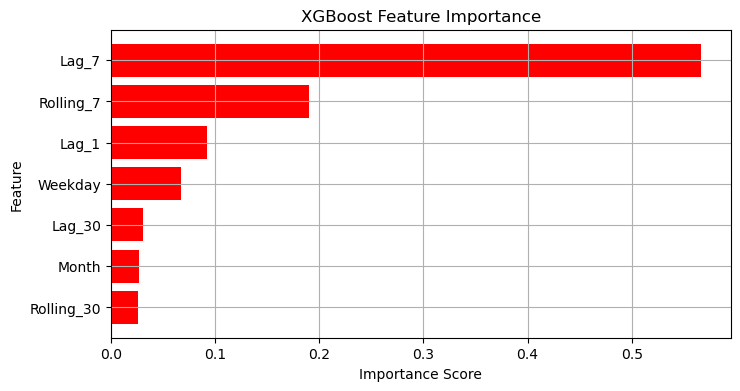

In [183]:
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='r')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Flip the order to have the most important feature on top
plt.grid(True)
plt.show()

In [184]:
future_dates_xgb = pd.date_range(start=daily_sales["Date"].max(), periods=90, freq="D")
future_dates_xgb

DatetimeIndex(['2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04',
               '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
      

In [185]:
future_sales_xgb = pd.DataFrame({"Date": future_dates_xgb})
future_sales_xgb

,Date
0,2023-12-31
1,2024-01-01
2,2024-01-02
3,2024-01-03
4,2024-01-04
...,...
85,2024-03-25
86,2024-03-26
87,2024-03-27
88,2024-03-28


In [186]:
# Using Last Available Data to Create Lag Features
future_sales_xgb["Lag_1"] = daily_sales["Total Gallons Sold"].iloc[-1]
future_sales_xgb["Lag_7"] = daily_sales["Total Gallons Sold"].iloc[-7]
future_sales_xgb["Lag_30"] = daily_sales["Total Gallons Sold"].iloc[-30]

In [187]:
future_sales_xgb["Rolling_7"] = daily_sales["Total Gallons Sold"].rolling(window=7).mean().iloc[-1]
future_sales_xgb["Rolling_30"] = daily_sales["Total Gallons Sold"].rolling(window=30).mean().iloc[-1]

In [188]:
future_sales_xgb["Weekday"] = future_sales_xgb["Date"].dt.dayofweek  
future_sales_xgb["Month"] = future_sales_xgb["Date"].dt.month

In [189]:
X_future = future_sales_xgb[["Lag_1", "Lag_7", "Lag_30", "Rolling_7", "Rolling_30", "Weekday", "Month"]]
X_future

,Lag_1,Lag_7,Lag_30,Rolling_7,Rolling_30,Weekday,Month
0,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,6,12
1,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,0,1
2,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,1,1
3,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,2,1
4,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,3,1
...,...,...,...,...,...,...,...
85,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,0,3
86,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,1,3
87,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,2,3
88,78193.324051,55959.981215,101085.795587,91784.516867,105535.227616,3,3


In [190]:
future_sales_xgb["Predicted Sales"] = xgb_tuned.predict(X_future)

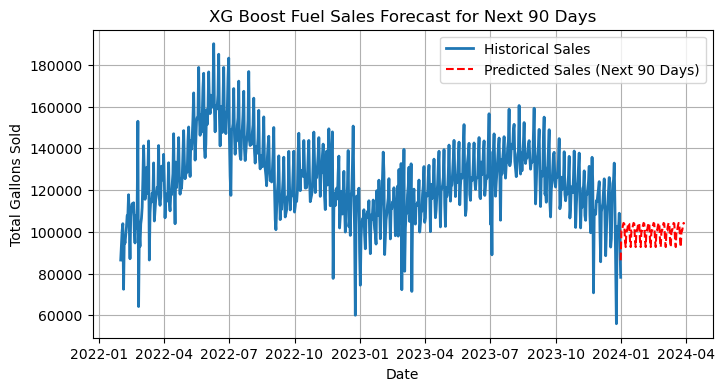

In [191]:
plt.figure(figsize=(8, 4))
plt.plot(daily_sales["Date"], daily_sales["Total Gallons Sold"], label="Historical Sales", linewidth=2)
plt.plot(future_sales_xgb["Date"], future_sales_xgb["Predicted Sales"], label="Predicted Sales (Next 90 Days)", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("XG Boost Fuel Sales Forecast for Next 90 Days")
plt.legend()
plt.grid(True)
plt.show()

#### LSTM

In [194]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 6.0/376.0 MB 33.5 MB/s eta 0:00:12
   -- ------------------------------------- 18.9/376.0 MB 54.1 MB/s eta 0:00:07
   -- ------------------------------------- 24.9/376.0 MB 42.6 MB/s eta 0:00:09
   ---- ----------------------------------- 39.3/376.0 MB 50.0 MB/s eta 0:00:07
   ------ --------------------------------- 60.3/376.0 MB 60.0 MB/s eta 0:00:06
   -------- ------------------------------- 76.5/376.0 MB 62.6 MB/s eta 0:00:05
   ---------- ----------------------------- 95.2/376.0 MB 66.7 MB/s eta 0:00:05
   ---------- ---------------------------- 105.1/376.0 MB 69.2 MB/s eta 0:00:04
   ------------ -------------------------- 115.9/376.0 MB 62.7 MB/s eta 0:00:05
   ------------ -------------------------- 123.7/376.0 MB 60.8 MB/s eta 0:00:05
   ------------- ------------------------- 130.0/376.0 MB 58.1 MB/s eta 0:00:05
   -------------- ------------------------ 135.0/3

In [196]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [197]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_sales[["Total Gallons Sold", "Lag_1", "Lag_7", "Lag_30", "Rolling_7", "Rolling_30"]])
scaled_data

array([[0.22744709, 0.06820731, 0.34996572, 0.14768336, 0.15330361,
        0.        ],
       [0.28240267, 0.22744709, 0.37259367, 0.2220661 , 0.16132584,
        0.01224173],
       [0.33212956, 0.28240267, 0.44881717, 0.32989519, 0.16016546,
        0.01998785],
       ...,
       [0.39456186, 0.33879515, 0.64538873, 0.55236283, 0.18827408,
        0.32247765],
       [0.27703841, 0.39456186, 0.51227027, 0.56845949, 0.1583245 ,
        0.31098696],
       [0.16575957, 0.27703841, 0.34034559, 0.5903353 , 0.14927988,
        0.29175495]])

In [200]:
X = scaled_data[:, 1:]  # Features
y = scaled_data[:, 0]   # Target

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [203]:
timesteps = 45
X_train = np.array([X_train[i:i+timesteps] for i in range(len(X_train) - timesteps)])
y_train = y_train[timesteps:]

In [204]:
X_test = np.array([X_test[i:i+timesteps] for i in range(len(X_test) - timesteps)])
y_test = y_test[timesteps:]

In [205]:
print(f" X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f" X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

 X_train shape: (515, 45, 5), y_train shape: (515,)
 X_test shape: (95, 45, 5), y_test shape: (95,)


In [206]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(timesteps, X_train.shape[2])), 
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

C:\Users\Sai Sravan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [207]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)
history

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0771 - mae: 0.2142 - val_loss: 0.0178 - val_mae: 0.1047
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0140 - mae: 0.0880 - val_loss: 0.0117 - val_mae: 0.0799
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0129 - mae: 0.0860 - val_loss: 0.0112 - val_mae: 0.0775
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0131 - mae: 0.0881 - val_loss: 0.0097 - val_mae: 0.0704
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0112 - mae: 0.0792 - val_loss: 0.0121 - val_mae: 0.0823
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0103 - mae: 0.0775 - val_loss: 0.0103 - val_mae: 0.0786
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0109 - mae: 0.0799 - val_loss: 0.0121 - val_mae: 0.0825
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0129 - mae: 0.0916 - val_loss: 0.0102 - val_mae: 0.0730
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.01

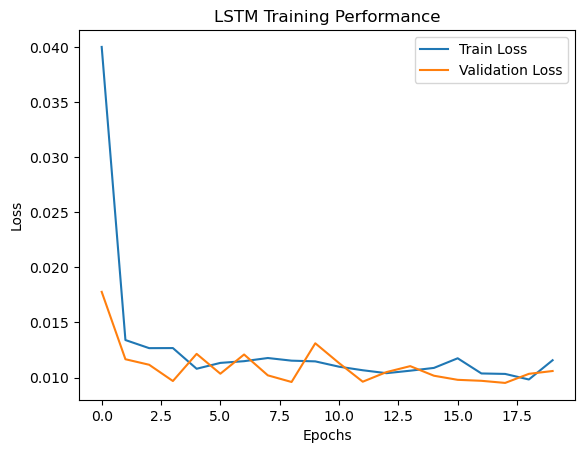

In [208]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training Performance")
plt.show()

In [209]:
#Model evolution

train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Train Loss: 0.0086, Train MAE: 0.0696
Test Loss: 0.0106, Test MAE: 0.0752


In [210]:
lstm_predictions = model.predict(X_test)
lstm_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


array([[0.55047494],
       [0.5468618 ],
       [0.5443177 ],
       [0.5425246 ],
       [0.54012436],
       [0.54000163],
       [0.5423926 ],
       [0.5447067 ],
       [0.5460621 ],
       [0.5476839 ],
       [0.54961777],
       [0.54859865],
       [0.5472077 ],
       [0.5468359 ],
       [0.54479396],
       [0.5415888 ],
       [0.5381056 ],
       [0.5345474 ],
       [0.5296566 ],
       [0.526765  ],
       [0.52422696],
       [0.52216804],
       [0.5193366 ],
       [0.5168418 ],
       [0.5147322 ],
       [0.51028997],
       [0.50768363],
       [0.5067854 ],
       [0.5055046 ],
       [0.5038963 ],
       [0.50246865],
       [0.5026224 ],
       [0.5024048 ],
       [0.5010363 ],
       [0.49909773],
       [0.49714053],
       [0.49613214],
       [0.49627608],
       [0.49752733],
       [0.49714658],
       [0.49730754],
       [0.49677458],
       [0.49438167],
       [0.49202073],
       [0.48953524],
       [0.4874888 ],
       [0.48339677],
       [0.479

In [211]:
inverse_input = np.zeros((lstm_predictions.shape[0], X_test.shape[2] + 1))
inverse_input

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0.

In [212]:
inverse_input[:, 0] = lstm_predictions[:, 0]
inverse_input[:, 1:] = X_test[:, -1, :]

In [213]:
lstm_predictions_original_scale = scaler.inverse_transform(inverse_input)[:, 0]
lstm_predictions_original_scale

array([129795.2231428 , 129310.59586472, 128969.35487838, 128728.84006374,
       128406.89846453, 128390.43722256, 128711.13963163, 129021.5287808 ,
       129203.32996697, 129420.85980315, 129680.25028184, 129543.55561688,
       129356.98954473, 129307.11813755, 129033.23313157, 128603.32209439,
       128136.12342607, 127658.85933588, 127002.85605837, 126615.00553309,
       126274.58001381, 125998.41649692, 125618.63269974, 125284.01138719,
       125001.04431668, 124405.20971671, 124055.62218514, 123935.14092412,
       123763.34919639, 123547.6261794 , 123356.13532578, 123376.76184558,
       123347.57292163, 123164.01288493, 122903.99481639, 122641.47438324,
       122506.2187778 , 122525.52615971, 122693.35647637, 122642.28585291,
       122663.87574312, 122592.39046141, 122271.42822215, 121954.75517974,
       121621.37705472, 121346.88844322, 120798.02314707, 120299.43299425,
       119965.20742307, 119719.36409082, 119620.06098908, 119641.89072254,
       119809.20137881, 1

In [214]:
inverse_actual = np.zeros((y_test.shape[0], X_test.shape[2] + 1))
inverse_actual

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0.

In [215]:
inverse_actual[:, 0] = y_test
inverse_actual[:, 1:] = X_test[:, -1, :]

In [216]:
y_test_actual_original_scale = scaler.inverse_transform(inverse_actual)[:, 0]
y_test_actual_original_scale

array([137070.37847725, 138079.49308946, 124735.79555612, 121428.965078  ,
       126607.9196083 , 126009.46532444, 129231.54888604, 134334.01428497,
       144634.79797545, 111043.69920493, 113440.32699345, 126163.79778279,
       120287.68122169, 122881.69397841, 124849.88822803, 138345.86038098,
       118026.15818541, 114855.16086682, 118694.10222286, 118043.03056718,
       122328.87991567, 126824.59473791, 136130.34271236, 106603.48782198,
       112131.11122548, 121551.54029549, 121065.00496035, 118757.95487797,
       126014.60068568, 138704.0258176 , 119479.59080488, 102073.45061929,
       112543.37327863, 120250.19475125, 124112.1414393 , 131141.26890499,
       137704.32286484, 115109.71635675, 101856.71277334, 114598.29351257,
       111777.05769792, 120726.61605614, 121765.78091264, 129187.37931044,
       107847.21761892, 105487.32509643, 117994.28914492, 117916.80721927,
       121049.08152862, 124195.32995409, 131355.41669344, 108081.47613554,
        99545.72222961, 1

In [217]:
future_X = X[-timesteps:]  # Start with the last 'timesteps' from your data
future_predictions = []

for _ in range(90):
    # Predict the next value
    pred = model.predict(future_X[np.newaxis, :, :])[0, 0]
    future_predictions.append(pred)

    new_timestep = np.append([pred], future_X[-1, 1:])
    future_X = np.vstack([future_X[1:], new_timestep])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━

In [218]:
future_predictions = np.array(future_predictions).reshape(-1, 1)

num_features = scaler.min_.shape[0]

if future_predictions.shape[1] < num_features:
    additional_features = num_features - future_predictions.shape[1]
    additional_data = np.zeros((future_predictions.shape[0], additional_features))

    # Concatenating the future predictions with the additional data
    future_predictions_with_features = np.concatenate([future_predictions, additional_data], axis=1)
else:
    future_predictions_with_features = future_predictions

In [219]:
# Inverse transform to get predictions in the original scale
future_predictions_original_scale = scaler.inverse_transform(future_predictions_with_features)[:, 0]
future_predictions_original_scale

array([105366.73206876, 103722.59857105, 102277.46701818, 101034.34344559,
        99982.27900877,  99102.99365439,  98374.22593116,  97773.51851576,
        97279.81317054,  96877.16031913,  96548.89085541,  96281.55756764,
        96064.40748328,  95888.39451429,  95746.51523767,  95631.89014942,
        95539.88227998,  95465.95459447,  95407.02510707,  95369.21781554,
        95343.98230788,  95326.01804819,  95314.00989597,  95307.00247558,
        95303.48477453,  95302.5933571 ,  95304.35220763,  95308.06977806,
        95313.08649944,  95319.06659123,  95325.80218927,  95332.58975334,
        95339.12148461,  95345.70917931,  95352.492746  ,  95359.04046682,
        95365.22842276,  95371.28046752,  95376.45308702,  95380.66233612,
        95383.97217302,  95388.00553707,  95391.63516497,  95394.82907763,
        95397.97102425,  95400.60930004,  95403.17162547,  95405.35819646,
        95407.21698168,  95408.79195237,  95410.13107721,  95411.25434311,
        95412.19372919,  

In [220]:
print(f"Length of future_predictions: {len(future_predictions)}")
print(f"Length of future_predictions_original_scale: {len(future_predictions_original_scale)}")

Length of future_predictions: 90
Length of future_predictions_original_scale: 90


#### Prediction for 90days

In [222]:
from datetime import timedelta
import datetime
last_date = daily_sales["Date"].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]
future_sales = pd.DataFrame({"Date": future_dates, "Predicted Sales": future_predictions_original_scale})

#### Ploting

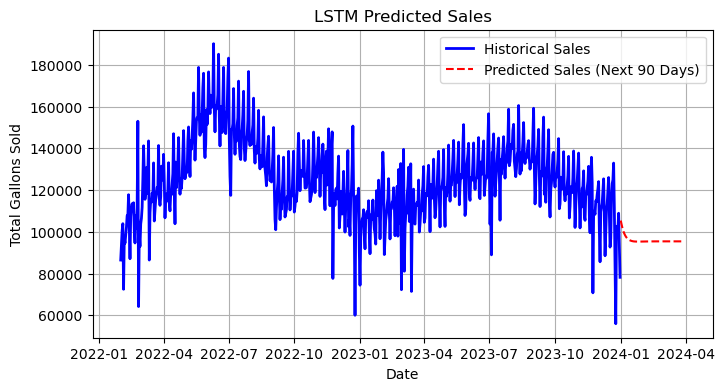

In [229]:
plt.figure(figsize=(8, 4))
plt.plot(daily_sales["Date"], daily_sales["Total Gallons Sold"], label="Historical Sales", linewidth=2, color="blue")
plt.plot(future_sales["Date"], future_sales["Predicted Sales"], label="Predicted Sales (Next 90 Days)", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Total Gallons Sold")
plt.title("LSTM Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
lstm_mae = mean_absolute_error(y_test_actual_original_scale, lstm_predictions_original_scale)

# Calculate RMSE
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_original_scale, lstm_predictions_original_scale))

# Calculate MAPE (Mean Absolute Percentage Error)
lstm_mape = np.mean(np.abs((y_test_actual_original_scale - lstm_predictions_original_scale) / y_test_actual_original_scale)) * 100

print(f"LSTM MAE: {lstm_mae:.2f}")
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM MAPE: {lstm_mape:.2f}%")


LSTM MAE: 10089.67
LSTM RMSE: 13804.62
LSTM MAPE: 10.03%
